# $\mathsf{CosmoFlow}$ Triple-H Integrals

<div class="alert alert-block alert-info"> Please reach out to the developers if you have questions! Your questions and feedback are very valuable to us. </div>

In [197]:
# Import the standard Python packages
import numpy as np
import matplotlib.pyplot as plt

# Import CosmoFlow modules (they must be located in the same parent folder as this notebook)
from Parameters import parameters
from Theory import theory
from Solver import solver

## Time Dependence

In [173]:
import scipy as sc
from mpmath import * 
mp.dps = 25; mp.pretty = True

def normalisation(mu, tau_star, k1, k2, k3):
    H1 = hankel2(-1j*mu, -k1 * tau_star)
    H2 = hankel2(-1j*mu, -k2 * tau_star)
    H3 = hankel2(-1j*mu, -k3 * tau_star)
    return (np.pi/4)**3 * np.exp(-3*np.pi*mu) * (-tau_star)**(9/2) * H1 * H2 * H3

In [174]:
def tripleH(mu, k1, k2, k3):
    n = 10000 # Number of points for the parameter evaluation
    N_load = np.linspace(-10, 20, n) # Time grid array in e-folds for the parameters
    DeltaN = 3 # Number of e-folds before horizon crossing
    N_exit = np.log(np.min([k1, k2, k3])) # Horizon exit for a mode
    
    # Theory 
    m = np.sqrt(mu**2 + 9/4)
    H_load = np.ones(n) # Hubble scale
    m_load = m * np.ones(n) # Mass
    g_load = 1 * np.ones(n) # Self-interaction coupling
    
    # Load the parameters and define continuous functions
    param = parameters(N_load, H_load, m_load, g_load) # Load the class parameters
    interpolated = param.output() # Define list with continuous parameters
    
    # Numerical parameters
    Nspan = np.linspace(-10, 20, 1000) # Time span in e-folds for the numerical integration
    Nfield = 1 # Number of fields
    Rtol, Atol = 1e-3, 1e-180 # Relative and absolute tolerance of the integrator
    Ni, Nf = N_exit - DeltaN, 20 # Sets initial and final time for integration
    N = np.linspace(Ni, Nf, 1000) # Define the time array for output correlators

    # Solve flow equations
    theo = theory(N = Nspan, Nfield = Nfield, interpolated = interpolated)
    s = solver(Nspan = N, Nfield = Nfield, interpolated = interpolated, Rtol = Rtol, Atol = Atol)
    f = s.f_solution(k1 = k1, k2 = k2, k3 = k3)
    return N, f

In [175]:
N, f3 = tripleH(mu = 1, k1 = 1, k2 = 1, k3 = 1)
f3 = f3[6][0, 0, 0]
norm_real = np.zeros(len(f3))
norm_im = np.zeros(len(f3))
norm_abs = np.zeros(len(f3))

for i in range(len(f3)):
    norm_real[i] = np.real(normalisation(mu = 1, tau_star = -np.exp(-N[i]), k1 = 1, k2 = 1, k3 = 1))
    norm_im[i] = np.imag(normalisation(mu = 1, tau_star = -np.exp(-N[i]), k1 = 1, k2 = 1, k3 = 1))
    norm_abs[i] = np.abs(normalisation(mu = 1, tau_star = -np.exp(-N[i]), k1 = 1, k2 = 1, k3 = 1))
    


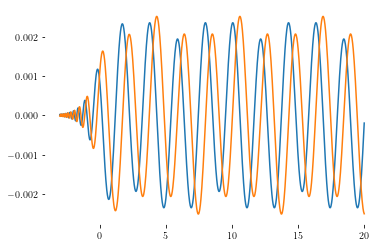

In [192]:
%matplotlib inline
plt.plot(N, norm_real * np.exp(9/2*N))
plt.plot(N, norm_im * np.exp(9/2*N))
#plt.plot(N, norm_abs * np.exp(9/2*N))
#plt.plot(N, f3 * np.exp(9/2*N))

#plt.plot(N, f3/norm_real)
#plt.plot(N, f3/norm_im)

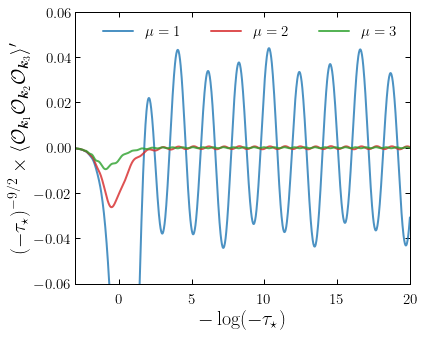

In [36]:
plt.rc('text.latex', preamble=r"\usepackage{bm}")

# Import figure style
plt.style.use('sty1.mplstyle')

# Define figure
fig = plt.figure()
ax = fig.add_subplot()

# Axis limits
ax.set_xlim([-3, 20])
ax.set_ylim([-0.06, 0.06])
#ax.set_yticks([-0.4, -0.2, 0, 0.2, 0.4])

# 3pt correlator
N, f = tripleH(mu = 1, k1 = 1, k2 = 1, k3 = 1)
a = np.exp(N)
ax.plot(N, f[6][0, 0, 0] * a**(9/2), color = "C0", alpha = 0.8, label = "$\mu = 1$")

N, f = tripleH(mu = 2, k1 = 1, k2 = 1, k3 = 1)
a = np.exp(N)
ax.plot(N, f[6][0, 0, 0] * a**(9/2), color = "C1", alpha = 0.8, label = "$\mu = 2$")

N, f = tripleH(mu = 3, k1 = 1, k2 = 1, k3 = 1)
a = np.exp(N)
ax.plot(N, f[6][0, 0, 0] * a**(9/2), color = "C2", alpha = 0.8, label = "$\mu = 3$")

# Labels
ax.set_xlabel(r"$-\log(-\tau_\star)$")
ax.set_ylabel(r"$(-\tau_\star)^{-9/2}\times\langle\mathcal{O}_{\bm{k}_1} \mathcal{O}_{\bm{k}_2} \mathcal{O}_{\bm{k}_3}\rangle'$")
ax.legend(ncol = 3, loc = 1)

# Save figure
plt.savefig('TripleH_TimeDependence.pdf', bbox_inches = "tight")

## Kinematic Dependence

In [126]:
def Kinematic(X, Y, mu):
    n = 10000 # Number of points for the parameter evaluation
    N_load = np.linspace(-10, 20, n) # Time grid array in e-folds for the parameters
    DeltaN = 3 # Number of e-folds before horizon crossing
    k = 1 # Mode corresponding to N = 0 horizon exit
    k1, k2, k3 = X*k, Y*k, k # Kinematic configuration for 3-pt function
    N_exit = np.log(np.min([k1, k2, k3])) # Horizon exit for a mode
    
    # Theory 
    m = np.real(np.sqrt(mu**2 + 9/4))
    H_load = np.ones(n) # Hubble scale
    m_load = m * np.ones(n) # Mass
    g_load = 1 * np.ones(n) # Self-interaction coupling
    
    # Load the parameters and define continuous functions
    param = parameters(N_load, H_load, m_load, g_load) # Load the class parameters
    interpolated = param.output() # Define list with continuous parameters
    
    # Numerical parameters
    Nspan = np.linspace(-10, 20, 1000) # Time span in e-folds for the numerical integration
    Nfield = 1 # Number of fields
    Rtol, Atol = 1e-3, 1e-180 # Relative and absolute tolerance of the integrator
    Ni, Nf = N_exit - DeltaN, 5 # Sets initial and final time for integration
    N = np.linspace(Ni, Nf, 1000) # Define the time array for output correlators

    # Solve flow equations
    theo = theory(N = Nspan, Nfield = Nfield, interpolated = interpolated)
    s = solver(Nspan = N, Nfield = Nfield, interpolated = interpolated, Rtol = Rtol, Atol = Atol)
    f = s.f_solution(k1 = k1, k2 = k2, k3 = k3)
    a = np.exp(N)
    three_pt = f[6][0, 0, 0] * a**(9/2) # Rescale the 3pt function
    return (k1*k2*k3)**2 * three_pt[-1] # Equivalent to shape function / Record the value at N = 5 e-folds

In [127]:
from joblib import Parallel, delayed # Needed for parallelisation
import time # Record the running time

n = 100

# Define the triangle
left_point = np.array([0.5, 0.5])
right_point = np.array([1, 1])
top_point = np.array([0.02, 1]) # Specify the softer configuration
left_m = (top_point[-1] - left_point[-1]) / (top_point[0] - left_point[0])
left_c = 1
right_m = (right_point[-1] - left_point[-1]) / (right_point[0] - left_point[0])
right_c = left_point[0] - right_m*left_point[0]
X_left = np.linspace(left_point[0], top_point[0], n)
Y_left = left_m * X_left + left_c
X_right = np.linspace(left_point[0], right_point[-1], n)
Y_right = right_m * X_right + right_c
LR_X = np.hstack([X_left[:, None], X_right[:, None]])
XX = np.meshgrid(np.linspace(LR_X[:, 0], LR_X[:, 1], n))[0].reshape(n, n) # k1/k3
YY = np.meshgrid([Y_left*np.ones(n)]*n)[0].reshape(n, n) # k2/k3

def process(i):
    S = []
    for j in range(n):
        S.append(Kinematic(X = XX[i, j], Y = YY[i, j], mu = 2)  )
    return S

start_time = time.time() # Start recording runtime
ZZ = Parallel(n_jobs = 6)(delayed(process)(i) for i in range(n)) # n_jobs is the number of cores
print("--- %s seconds ---" % (time.time() - start_time)) # Print runtime

ZZ = np.nan_to_num(ZZ)

# Save file
np.save("k1k3_200.npy", XX)
np.save("k2k3_200.npy", YY)
np.save("TripleH_mu2.npy", ZZ)

--- 3043.439391851425 seconds ---


In [124]:
XX = np.load("k1k3_50.npy")
YY = np.load("k2k3_50.npy")
ZZ = np.load("TripleH_mu1j.npy")

import matplotlib as mpl
plt.style.use('default')
plt.rc('text.latex', preamble=r"\usepackage{bm}")
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
mpl.rc('axes', edgecolor = "w", labelcolor = "k")

fig = plt.figure(figsize = (6, 4))
ax = plt.axes(projection = '3d')
ax.grid(False)
ax.view_init(30, 230)

ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

edges_kw = dict(color = "k", linewidth = 0.5, zorder = 1e3)

ax.set_xlim(0, 1)
ax.set_ylim(0.5, 1)
ax.set_zlim(0.5, 1.1)

ax.set_xticks([0, 0.5, 1])
ax.set_yticks([0.5, 1])
ax.set_zticks([0.5, 1])


ax.xaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.zaxis.set_rotate_label(False)
ax.set_xlabel("$k_1/k_3$", fontsize = 12)
ax.set_ylabel("$k_2/k_3$", fontsize = 12)
ax.set_title(r"$\langle\mathcal{O}_{\bm{k}_1} \mathcal{O}_{\bm{k}_2} \mathcal{O}_{\bm{k}_3}\rangle'$", fontsize = 12)

# Plot Shape
c_m = mpl.cm.coolwarm
ax.plot_surface(XX, YY, ZZ/ZZ[-1, -1], rstride = 1, cstride = 1, cmap = c_m, edgecolor = "None") # 3D shape
cset = ax.contourf(XX, YY, ZZ/ZZ[-1, -1], zdir = "z", offset = 0.5, levels = 10, cmap = c_m, alpha = 0.4) # Projection

# Save figure
plt.savefig('TripleH_shape_mu1j.pdf', bbox_inches = "tight")

Using matplotlib backend: MacOSX


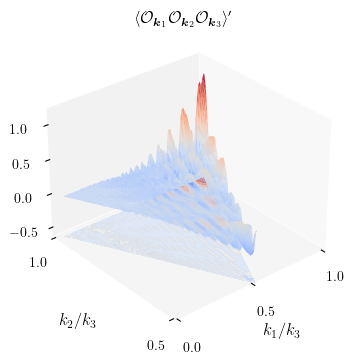

In [196]:
XX = np.load("k1k3_200.npy")
YY = np.load("k2k3_200.npy")
ZZ = np.load("TripleH_mu2.npy")

import matplotlib as mpl
plt.style.use('default')
plt.rc('text.latex', preamble=r"\usepackage{bm}")
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
mpl.rc('axes', edgecolor = "w", labelcolor = "k")

fig = plt.figure(figsize = (6, 4))
ax = plt.axes(projection = '3d')
ax.grid(False)
ax.view_init(30, 230)

ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

edges_kw = dict(color = "k", linewidth = 0.5, zorder = 1e3)

ax.set_xlim(0, 1)
ax.set_ylim(0.5, 1)
ax.set_zlim(-0.6, 1.2)

ax.set_xticks([0, 0.5, 1])
ax.set_yticks([0.5, 1])
ax.set_zticks([-0.5, 0, 0.5, 1])


ax.xaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.zaxis.set_rotate_label(False)
ax.set_xlabel("$k_1/k_3$", fontsize = 12)
ax.set_ylabel("$k_2/k_3$", fontsize = 12)
ax.set_title(r"$\langle\mathcal{O}_{\bm{k}_1} \mathcal{O}_{\bm{k}_2} \mathcal{O}_{\bm{k}_3}\rangle'$", fontsize = 12)

# Plot Shape
c_m = mpl.cm.coolwarm
ax.plot_surface(XX, YY, ZZ/ZZ[-1, -1], rstride = 1, cstride = 1, cmap = c_m, edgecolor = "None") # 3D shape
cset = ax.contourf(XX, YY, ZZ/ZZ[-1, -1], zdir = "z", offset = -0.6, levels = 10, cmap = c_m, alpha = 0.4) # Projection

# Save figure
plt.savefig('TripleH_shape_mu2.pdf', bbox_inches = "tight")